In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import iqr


In [2]:
# Load data from CSV file
df = pd.read_csv('Jira_exported_data.csv', sep=',')

print(df.isnull().sum())

print(df.columns)

Updated      0
Issue key    0
Created      0
Resolved     0
dtype: int64
Index(['Updated', 'Issue key', 'Created', 'Resolved'], dtype='object')


In [3]:
def convert_to_datetime(df):
    """
    Converts 'Created' and 'Resolved' columns to datetime format
    """
    try:
        df['Created'] = pd.to_datetime(df['Created'])
        df['Resolved'] = pd.to_datetime(df['Resolved'])
    except Exception as e:
        print(f"Error in converting columns to datetime: {str(e)}")
        raise e # Re-raise the exception to see the full traceback
    """Calculates 'Delivery_Time'in days with correct rounding up and plots its boxplot"""

    df.loc[:, 'Delivery_Time'] = np.ceil((df['Resolved'] - df['Created']).dt.total_seconds() / 86400).astype(int)
        
convert_to_datetime(df)

print(df.dtypes) #Check the conversion was applied for Created and Resolved: should be datetime64[ns]


Updated                  object
Issue key                object
Created          datetime64[ns]
Resolved         datetime64[ns]
Delivery_Time             int64
dtype: object


In [4]:
print(df.head())

            Updated    Issue key             Created            Resolved  \
0  2024-02-29 16:40  ISSUE-94383 2024-02-28 19:37:00 2024-02-29 16:40:00   
1  2024-02-29 20:19  ISSUE-94367 2024-02-28 17:00:00 2024-02-29 16:40:00   
2  2024-02-28 13:51  ISSUE-94325 2024-02-28 13:36:00 2024-02-28 13:37:00   
3  2024-03-01 10:49  ISSUE-94203 2024-02-27 12:21:00 2024-03-01 10:49:00   
4  2024-02-27 10:42  ISSUE-94135 2024-02-26 19:41:00 2024-02-27 10:42:00   

   Delivery_Time  
0              1  
1              1  
2              1  
3              3  
4              1  


In [5]:
# Filter dataframe for rows where Delivery_Time is zero
df_zero_delivery = df[df['Delivery_Time'] == 0]

# Display the count of rows and the rows
print(f"Number of rows where Delivery_Time is zero: {df_zero_delivery.shape[0]}")
print(df_zero_delivery)

Number of rows where Delivery_Time is zero: 1
              Updated    Issue key             Created            Resolved  \
294  2023-11-06 12:29  ISSUE-86578 2023-11-06 09:44:00 2023-11-06 09:44:00   

     Delivery_Time  
294              0  


In [6]:
# Removing rows where Delivery_Time is zero
df = df[df['Delivery_Time'] != 0]

# Display the updated DataFrame
print(df)

              Updated    Issue key             Created            Resolved  \
0    2024-02-29 16:40  ISSUE-94383 2024-02-28 19:37:00 2024-02-29 16:40:00   
1    2024-02-29 20:19  ISSUE-94367 2024-02-28 17:00:00 2024-02-29 16:40:00   
2    2024-02-28 13:51  ISSUE-94325 2024-02-28 13:36:00 2024-02-28 13:37:00   
3    2024-03-01 10:49  ISSUE-94203 2024-02-27 12:21:00 2024-03-01 10:49:00   
4    2024-02-27 10:42  ISSUE-94135 2024-02-26 19:41:00 2024-02-27 10:42:00   
..                ...          ...                 ...                 ...   
380  2023-12-18 10:20  ISSUE-66182 2023-01-04 10:56:00 2023-12-13 14:09:00   
381  2023-12-26 16:45  ISSUE-66158 2023-01-03 17:14:00 2023-12-13 10:36:00   
382  2023-11-13 12:23  ISSUE-58045 2022-09-02 16:18:00 2023-11-13 12:22:00   
383  2023-11-06 12:29  ISSUE-53790 2022-06-22 15:18:00 2023-11-02 21:33:00   
384  2024-01-03 11:38  ISSUE-52579 2022-06-03 12:19:00 2023-12-20 14:51:00   

     Delivery_Time  
0                1  
1                1  


Statistics for Delivery_Time:
count    384.000000
mean      26.325521
std       59.109809
min        1.000000
25%        3.000000
50%       12.500000
75%       27.000000
95%       85.700000
99%      351.480000
max      566.000000
Name: Delivery_Time, dtype: float64
Skewness: 5.9552
Kurtosis: 41.4463
MAD: 10.5000
IQR: 24.0000
Range: 565.0000


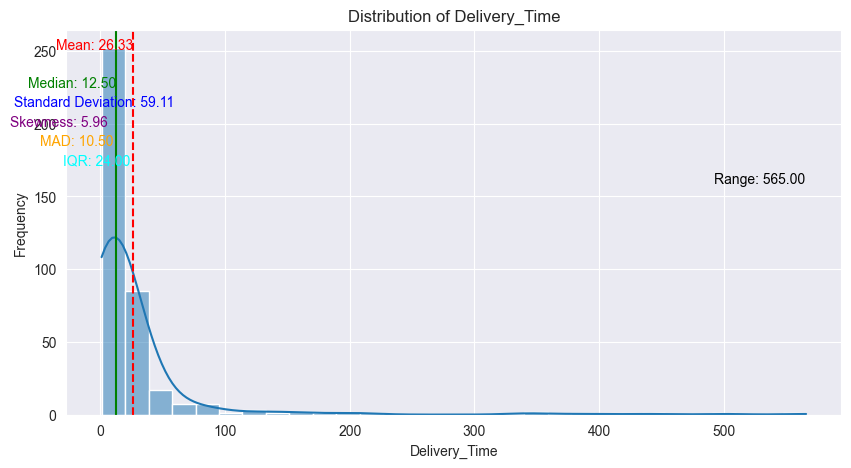

In [7]:
#print key statistics

# Initialize stats_df as an empty DataFrame
stats_df = pd.DataFrame()


def mad(data):
    return np.median(np.abs(data - np.median(data)))


def plot_distribution_and_stats(df, column_name='Delivery_Time'):
    column_data = df[column_name]
    column_stats = column_data.describe(percentiles=[.25, .5, .75, .95, .99])
    skewness = column_data.skew()
    kurtosis = column_data.kurt()
    mad_value = mad(column_data)
    iqr_value = iqr(column_data)
    data_range = column_data.max() - column_data.min()  # Range calculation
    print(f"Statistics for {column_name}:")
    print(column_stats)
    print(f'Skewness: {skewness:.4f}')
    print(f'Kurtosis: {kurtosis:.4f}')
    print(f'MAD: {mad_value:.4f}')
    print(f'IQR: {iqr_value:.4f}')
    print(f'Range: {data_range:.4f}')  # printing the Range
    global stats_df
    new_df = pd.DataFrame({
        'Column': [column_name],
        'Mean': [column_stats['mean']],
        'Median': [column_stats['50%']],
        'Std Dev': [column_stats['std']],
        '25%': [column_stats['25%']],
        '75%': [column_stats['75%']],
        '95%': [column_stats['95%']],
        '99%': [column_stats['99%']],
        'Skewness': [skewness],
        'Kurtosis': [kurtosis],
        'MAD': [mad_value],
        'IQR': [iqr_value],
        'Range': [data_range]  # data frame now includes the Range
    })
    stats_df = pd.concat([stats_df, new_df], ignore_index=True)

    plt.figure(figsize=(10, 5))
    sns.histplot(column_data, kde=True, bins=30)
    plt.axvline(column_stats['mean'], color='r', linestyle='--')
    plt.axvline(column_stats['50%'], color='g', linestyle='-')
    plt.text(column_stats['mean'], plt.ylim()[1] * 0.95, f'Mean: {column_stats["mean"]:.2f}', color='r', ha='right')
    plt.text(column_stats['50%'], plt.ylim()[1] * 0.85, f'Median: {column_stats["50%"]:.2f}', color='g', ha='right')
    plt.text(column_stats['std'], plt.ylim()[1] * 0.80, f'Standard Deviation: {column_stats["std"]:.2f}', color='b',
             ha='right')
    plt.text(skewness, plt.ylim()[1] * 0.75, f'Skewness: {skewness:.2f}', color='purple', ha='right')
    plt.text(mad_value, plt.ylim()[1] * 0.70, f'MAD: {mad_value:.2f}', color='orange', ha='right')
    plt.text(iqr_value, plt.ylim()[1] * 0.65, f'IQR: {iqr_value:.2f}', color='cyan', ha='right')
    plt.text(data_range, plt.ylim()[1] * 0.60, f'Range: {data_range:.2f}', color='black', ha='right')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column_name}')
    plt.show()

plot_distribution_and_stats(df, 'Delivery_Time')


In [8]:
# check what specific issues causes long tail
def find_and_print_outliers(df, column_name='Delivery_Time', issue_key='Issue key'):
    column_data = df[column_name]

    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(column_data < lower_bound) | (column_data > upper_bound)]

    for index, row in outliers.iterrows():
        print(row[issue_key])


find_and_print_outliers(df, 'Delivery_Time', 'Issue key')


ISSUE-88713
ISSUE-87683
ISSUE-87613
ISSUE-86824
ISSUE-84729
ISSUE-84484
ISSUE-84191
ISSUE-84131
ISSUE-83642
ISSUE-82932
ISSUE-82059
ISSUE-82049
ISSUE-80914
ISSUE-79926
ISSUE-79662
ISSUE-79661
ISSUE-79342
ISSUE-79280
ISSUE-78154
ISSUE-77099
ISSUE-76803
ISSUE-72291
ISSUE-66182
ISSUE-66158
ISSUE-58045
ISSUE-53790
ISSUE-52579


Statistics for Delivery_Time (After removing outliers):
count    357.000000
mean      14.333333
std       13.489835
min        1.000000
25%        3.000000
50%       11.000000
75%       21.000000
95%       42.200000
99%       57.000000
max       62.000000
Name: Delivery_Time, dtype: float64
Skewness: 1.1686
Kurtosis: 0.9927


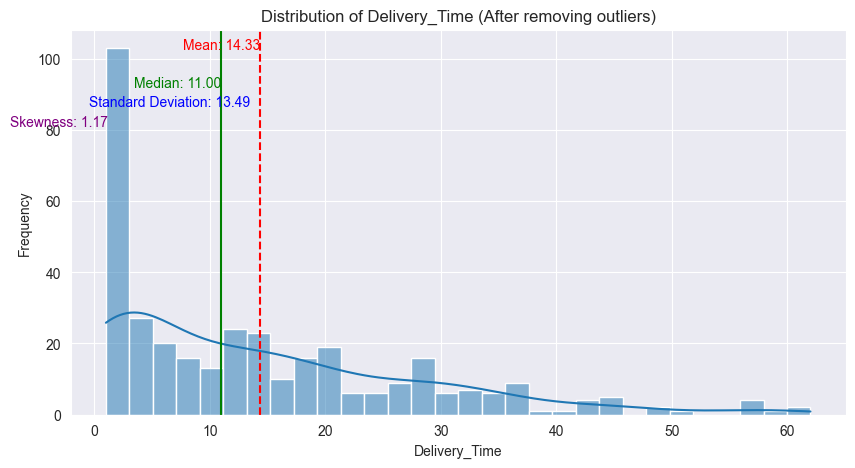

In [9]:
# Applying Interquartile Range Method  - removing outlier on a distance of 1.5IQR
stats_df = pd.DataFrame()


def plot_distribution_and_stats(df, column_name='Delivery_Time'):
    column_data = df[column_name]

    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = column_data[(column_data >= lower_bound) & (column_data <= upper_bound)]

    column_stats = filtered_data.describe(percentiles=[.25, .5, .75, .95, .99])
    skewness = filtered_data.skew()
    kurtosis = filtered_data.kurt()

    print(f"Statistics for {column_name} (After removing outliers):")
    print(column_stats)
    print(f'Skewness: {skewness:.4f}')
    print(f'Kurtosis: {kurtosis:.4f}')

    global stats_df
    new_df = pd.DataFrame({
        'Column': [column_name],
        'Mean': [column_stats['mean']],
        'Median': [column_stats['50%']],
        'Std Dev': [column_stats['std']],
        '25%': [column_stats['25%']],
        '75%': [column_stats['75%']],
        '95%': [column_stats['95%']],
        '99%': [column_stats['99%']],
        'Skewness': [skewness],
        'Kurtosis': [kurtosis]
    })
    stats_df = pd.concat([stats_df, new_df], ignore_index=True)

    plt.figure(figsize=(10, 5))
    sns.histplot(filtered_data, kde=True, bins=30)
    plt.axvline(column_stats['mean'], color='r', linestyle='--')
    plt.axvline(column_stats['50%'], color='g', linestyle='-')
    plt.text(column_stats['mean'], plt.ylim()[1] * 0.95, f'Mean: {column_stats["mean"]:.2f}', color='r', ha='right')
    plt.text(column_stats['50%'], plt.ylim()[1] * 0.85, f'Median: {column_stats["50%"]:.2f}', color='g', ha='right')
    plt.text(column_stats['std'], plt.ylim()[1] * 0.80, f'Standard Deviation: {column_stats["std"]:.2f}', color='b',
             ha='right')
    plt.text(skewness, plt.ylim()[1] * 0.75, f'Skewness: {skewness:.2f}', color='purple', ha='right')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column_name} (After removing outliers)')
    plt.show()


# pass the name of the column here in 'your_column_name'
plot_distribution_and_stats(df, 'Delivery_Time')

1) Percentiles (e.g., 50th, 90th) indicate the proportion of historical deliveries completed within a certain timeframe. For instance, the 50th percentile (median) means that 50% of the tasks were completed by this time, suggesting a typical delivery timeline.
2) Choose a percentile based on the desired confidence level. A higher percentile (e.g., 90th) suggests a higher confidence level but a longer delivery time.
3) Use the selected historical percentile to estimate the delivery time for the current data. If the 90th percentile from historical data is 10 days, you can say with 90% confidence that the data will be delivered within 10 days.
4) Consider any factors that might affect the applicability of historical data (e.g., increased team size, improved tools, different project complexity) and adjust the estimate accordingly.
5) When communicating the estimated delivery time, clearly state the associated confidence level. For example, "Based on historical data, we are 90% confident that the data will be delivered within 10 days."
6) Highlight any assumptions or potential variables that could impact the delivery time.

Example Calculation:
Assuming the historical data provides the following delivery time percentiles for a similar type of data delivery:

50th percentile: 8 days
75th percentile: 12 days
90th percentile: 15 days
If your risk tolerance allows for a 10% chance of delay, you might use the 90th percentile to answer the delivery question, indicating that you are 90% confident the data will be delivered within 15 days.

